In [1]:
import re
import collections
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm
import nltk

from collections import Counter

In [2]:
df = pd.read_csv('../datasets/raw/2020_06_23_CE-BVerwG_DE_Datensatz.csv')

In [3]:
minidf = df.sample(frac = 0.05)
minidf['text_normalized'] = minidf['text'].str.lower().str.replace("\n", " ").replace('\s+', ' ', regex=True)


In [4]:
vocab = nltk.lm.Vocabulary(minidf['text_normalized'], unk_cutoff=10)
data = []
total_num_documents = 300
for judgement in minidf['text_normalized']:
    data.extend(judgement.split(" "))
filtered_data = [word for word in data if len(word) > 1 or not word.isalpha()]


In [5]:
min_len = 20
max_len = 25


In [6]:
longgrams = list(nltk.everygrams(filtered_data, min_len=min_len, max_len=max_len-1))

In [7]:
most_common = Counter(longgrams)
most_common = most_common.most_common(10000)

In [23]:
phrases = []
frequencies_per_ngramlength = {i:[] for i in range(min_len, max_len)}
for phrase, frequency in most_common:
    if frequency < 5: # stop evaluating if the first ngram has less than x occurences
        break
    frequencies_per_ngramlength[len(phrase)].append((frequency, phrase))

frequencies = []
lengths = []
length_keys = list(frequencies_per_ngramlength.keys())
for length in length_keys[::-1]:
    counter = 0
    for frequency, phrase_candidate in frequencies_per_ngramlength[length]:
        phrase_candidate = " ".join(phrase_candidate)
        cut_phrase_candidate = " ".join(phrase_candidate[4:-4])
        if not any(cut_phrase_candidate in phrase for phrase in phrases):
            lengths.append(length)
            frequencies.append(frequency)
            phrases.append(phrase_candidate)
            counter += 1
            if counter > 5: # we only check the top 5 phrases at the given n
                break

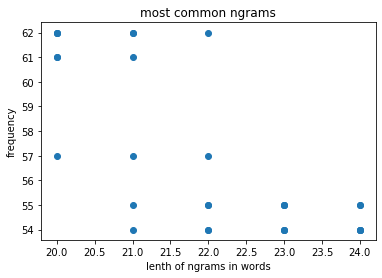

In [24]:
plt.title("most common ngrams")
plt.ylabel("frequency")
plt.xlabel("lenth of ngrams in words")
plt.scatter(lengths, frequencies)
plt.show()

In [25]:
for i in range(len(phrases)):
    print("freq: ", frequencies[i], "length", lengths[i])
    print(phrases[i])
    print("")

freq:  55 length 24
bedarf es nicht. die revision ist innerhalb eines monats nach zustellung dieses beschlusses zu begründen. die begründung ist bei dem bundesverwaltungsgericht, simsonplatz 1, 04107

freq:  55 length 24
es nicht. die revision ist innerhalb eines monats nach zustellung dieses beschlusses zu begründen. die begründung ist bei dem bundesverwaltungsgericht, simsonplatz 1, 04107 leipzig,

freq:  54 length 24
der einlegung einer revision durch den beschwerdeführer bedarf es nicht. die revision ist innerhalb eines monats nach zustellung dieses beschlusses zu begründen. die begründung

freq:  54 length 24
einlegung einer revision durch den beschwerdeführer bedarf es nicht. die revision ist innerhalb eines monats nach zustellung dieses beschlusses zu begründen. die begründung ist

freq:  54 length 24
einer revision durch den beschwerdeführer bedarf es nicht. die revision ist innerhalb eines monats nach zustellung dieses beschlusses zu begründen. die begründung ist bei

freq:  5

In [ ]:
plt.title("anzahl dokumente nach verfahrensart für top 6 verfahrensarten. ")
subset = df.groupby(['Verfahrensart', 'Entscheidungsart']).size()
subset[subset > 200].sort_values().plot(kind='bar')
plt.show()
count = minidf['text'].str.split(" ").apply(len).sort_values()
plt.xscale("log")
count.plot.hist(bins=100)
plt.show()

In [20]:
import spacy #load spacy
nlp = spacy.load("de_core_news_sm", disable=['parser', 'tagger', 'ner'])
#stopwords = stopwords.words("german")

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)

    


tempdf = single_row['text'].apply(normalize, lowercase=True, remove_stopwords=False)


NameError: name 'single_row' is not defined